# Exercise 3: Introduction to Convolutional Neural Networks (CNN)

Convolutional Neural Networks (CNN) are a cornerstone of deep learning, specialized in analyzing spatial or temporal data. 
The core of CNN lies in its convolution layers—conv1D, conv2D, and conv3D—which autonomously extract hierarchal features from the input data, making CNNs highly efficient and interpretable. 
Understanding the mechanics of these convolution operations is important. In this tutorial, we will delve into the 1D, 2D, and 3D convolutions and explore their implementation in PyTorch, providing a hands-on understanding of how to leverage CNNs for various data formates.


<img src="images/conv_overview.png" width="900"/>

## Imports & Utils

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import torch.nn as nn
import torch

## 1D 

```torch.nn.Conv1d(in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1, bias=True, padding_mode='zeros', device=None, dtype=None)```

<img src="images/1dcnn_overview.png" width="600"/>

### weight learnt in 1DCNN

the convolution kernel learned in 1DCNN has weight and bias. The shape of weight is (out channel, in channel / group, kernel size)

<img src="images/1dcnn_weight.png" width="600"/>

<img src="images/1dcnn_convolution.png" width="600"/>

### stride
refers to the step size that the convolutional kernel takes as it slides across the input data. 
It is often used to reduce the spatial dimention (and thus also the computational efficiency) and increase receptive field.
The following figure shows different convolution bands, where red represents the first convolution and purple represents the second convolution

<img src="images/1dcnn_stride.png" width="600"/>

### dilation
spacing between the values in the kernel. 
A dilation of 1 means no spacing between the kernel values, which is the standard convolution. 
A dilation of 2 means one value spacing between kernel values, and so on.

Dilation is used to expand the receptive field of the kernel without increasing the number of parameters in the kernel (compare to stride).

<img src="images/1dcnn_dilation.png" width="600"/>

## 2D & 3D 

Conv2D and Conv3D are extensions of the convolution operation to 2 and 3 dimensions. They operate under the same principle as Conv1D, but at higher dimensions.

Even when handling multi-channel images (e.g., RGB images), Conv2D operates in a 2D plane for each channel, without intertwining information across channels in the depth dimension.
Unlike Conv2D, Conv3D has the ability to convolute in the depth direction, thus able to capture spatial-temporal features in scenarios like video processing where frames add a third dimension.

The distinction in handling the depth dimension is crucial. In Conv2D, each channel is treated separately on a 2D plane, whereas Conv3D handles the depth dimension as an integral part of the convolution operation, allowing for multi-channel convolution along the depth. Hence, the term "depth" in Conv3D doesn't correspond to the "channel" concept in Conv2D. Each depth slice in Conv3D can contain multiple channels, establishing a distinction between depth and channel, and enabling richer feature extraction from multi-dimensional data.

<img src="images/xdcnn_kernel.png" width="600"/>

## demo

### 2D (Simple Crack Detection)

Text(0.5, 1.0, 'Crack Image')

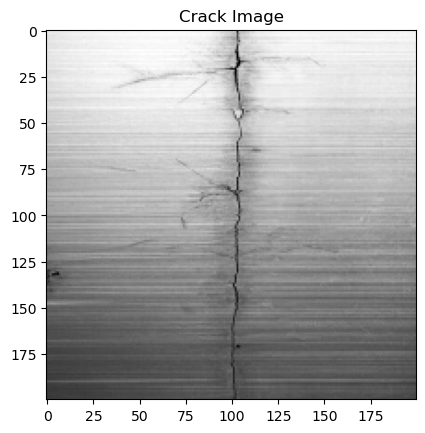

In [3]:
# load crack image from the images folder
img = plt.imread('images/crack.png')
# convert to grayscale
img = np.mean(img, axis=2)
# visualize the image
plt.imshow(img, cmap='gray')
plt.title('Crack Image')

In [4]:
# convert the image to a tensor
crack_tensor = torch.tensor(img)
crack_tensor.shape

torch.Size([200, 200])

In [11]:
# a kernel to detect vertical edges
v_kernel = torch.tensor([[-1., 1.], [-1., 1.]])
# apply the kernel to the image
# input shape: (b, #in_chanels, height, width)
# weight shape: (#out_chanels, #in_chanels, kernel_height, kernel_width)
v_edges = nn.functional.conv2d(input=crack_tensor.unsqueeze(0).unsqueeze(0), weight=v_kernel.unsqueeze(0).unsqueeze(0), padding='same')
v_edges.shape

torch.Size([1, 1, 200, 200])

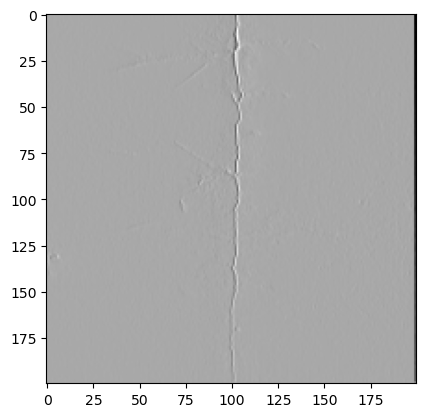

In [12]:
# visualize edges
plt.imshow(v_edges[0, 0].detach().numpy(), cmap='gray')

In [9]:
# a kernel to detect horizonal edges
h_kernel = torch.tensor([[-1., -1.], [1., 1.]])
# apply the kernel to the image
# input shape: (b, #in_chanels, height, width)
# weight shape: (#out_chanels, #in_chanels, kernel_height, kernel_width)
h_edges = nn.functional.conv2d(input=crack_tensor.unsqueeze(0).unsqueeze(0), weight=h_kernel.unsqueeze(0).unsqueeze(0), padding='same')
h_edges.shape

torch.Size([1, 1, 200, 200])

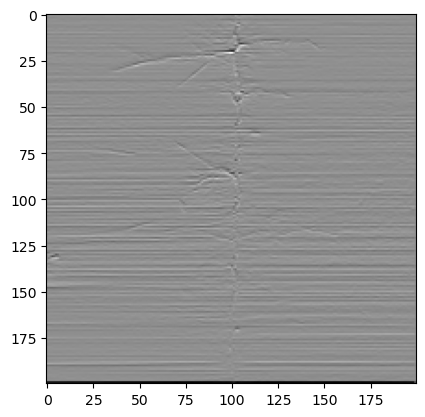

In [10]:
# visualize edges
plt.imshow(h_edges[0, 0].detach().numpy(), cmap='gray')

### 1D (simple human activity recognition)

Can you detect Sitting, Walking, Running Phases from the given data?

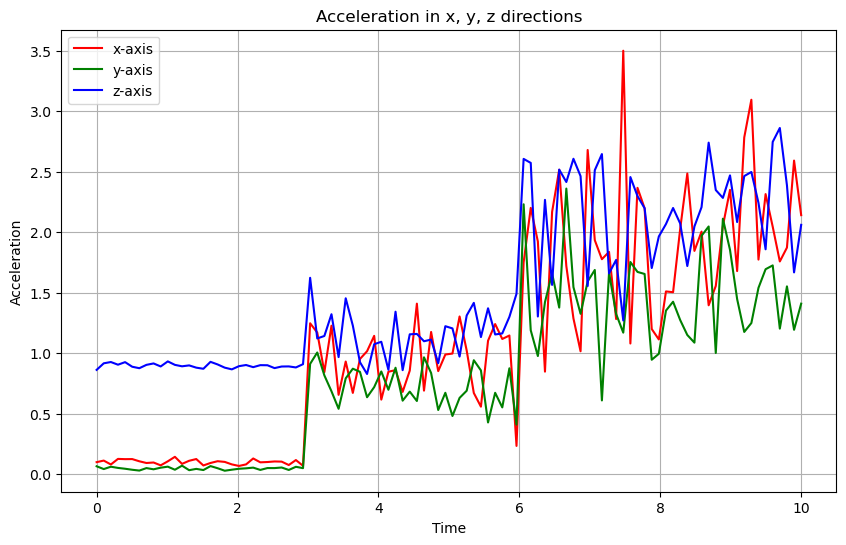

In [44]:
# Example time series for acceleration in x, y, z directions over a longer time
time_steps = np.linspace(0, 10, 100)  # 100 time steps

x1 = np.random.normal(0.1, 0.02, 30)  
y1 = np.random.normal(0.05, 0.01, 30)
z1 = np.random.normal(0.9, 0.02, 30)

x2 = np.random.normal(1.0, 0.3, 30)    
y2 = np.random.normal(0.7, 0.2, 30)
z2 = np.random.normal(1.1, 0.2, 30)

x3 = np.random.normal(2.0, 0.5, 40)
y3 = np.random.normal(1.5, 0.4, 40)
z3 = np.random.normal(2.2, 0.4, 40)

# Concatenate to create a full time series
x_data = np.concatenate([x1, x2, x3])
y_data = np.concatenate([y1, y2, y3])
z_data = np.concatenate([z1, z2, z3])

# Plot the acceleration data for each axis
plt.figure(figsize=(10, 6))
plt.plot(time_steps, x_data, label="x-axis", color='r')
plt.plot(time_steps, y_data, label="y-axis", color='g')
plt.plot(time_steps, z_data, label="z-axis", color='b')
plt.title("Acceleration in x, y, z directions")
plt.xlabel("Time")
plt.ylabel("Acceleration")
plt.legend()
plt.grid(True)
plt.show()

In [50]:
# input data, shape: (b, #in_chanels, length)
input_data = torch.tensor([x_data, y_data, z_data], dtype=torch.float32).view(1, 3, -1)

# kernel to detect sum of acceleration in x, y, z directions, shape: (#out_chanels, #in_chanels, kernel_size)
sum_kernel = torch.tensor([1., 1., 1.]).view(1, 3, 1)
# apply the kernel to the image
# 
sum_acceleration = nn.functional.conv1d(input=input_data, weight=sum_kernel)
sum_acceleration.shape

torch.Size([1, 1, 100])

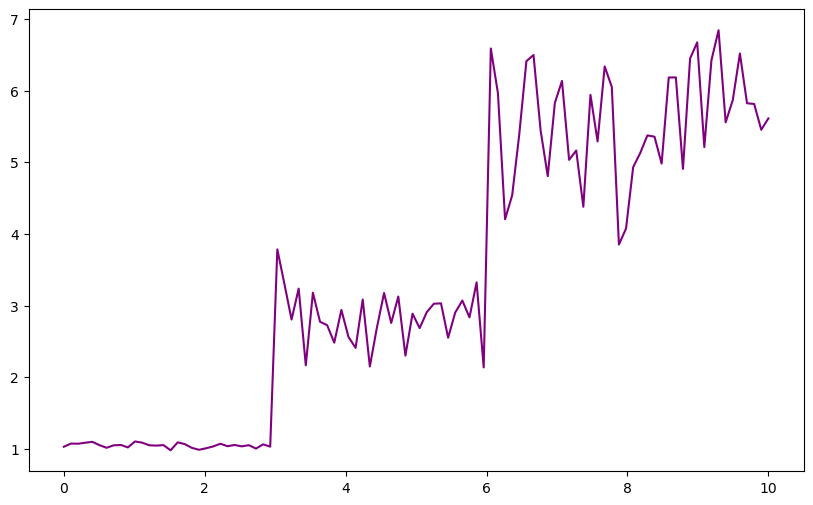

In [51]:
# Plot the sum of acceleration
plt.figure(figsize=(10, 6))
plt.plot(time_steps, sum_acceleration[0, 0].detach().numpy(), label="sum of acceleration", color='purple')